<div style = "font-size: 20px">
Выпускная квалификационная работа Михаила Захарова <P>
Продолжение кода  
</div >

In [483]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import pickle

In [484]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 48

In [486]:
# Пути для локального запуска
nb_path = r"C:\VKR"
data_path = r"C:\VKR\data"
models_path = r"C:\VKR\models"

In [487]:
df = pd.read_excel(r"C:\VKR\Datasets\itog.xlsx")

In [488]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [489]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

<div style = "font-size: 20px">
Проведем предобработку данных
</div >

Найду выбросы

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. Экспериментирую, как они отработают на данном наборе данных.

Соотношение матрица-наполнитель: 3s=0 iq=6


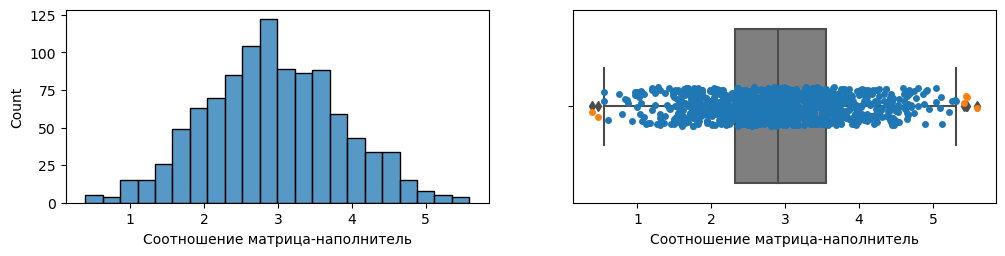

Плотность, кг/м3: 3s=3 iq=9


модуль упругости, ГПа: 3s=2 iq=2


Количество отвердителя, м.%: 3s=2 iq=14


Содержание эпоксидных групп,%_2: 3s=2 iq=2


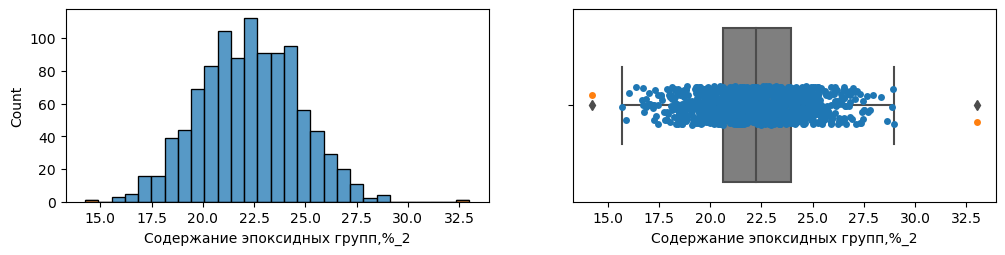

Температура вспышки, С_2: 3s=3 iq=8


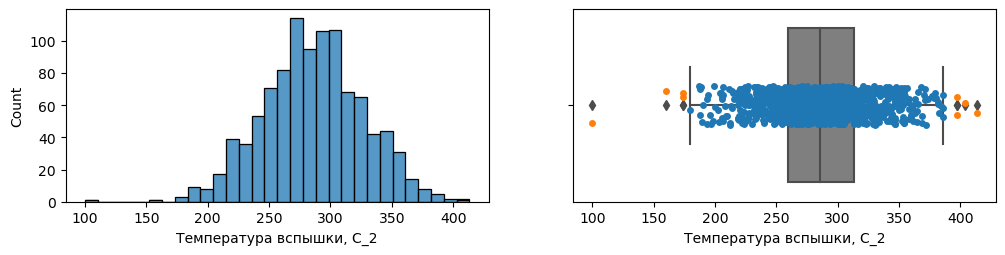

Поверхностная плотность, г/м2: 3s=2 iq=2


Модуль упругости при растяжении, ГПа: 3s=0 iq=6


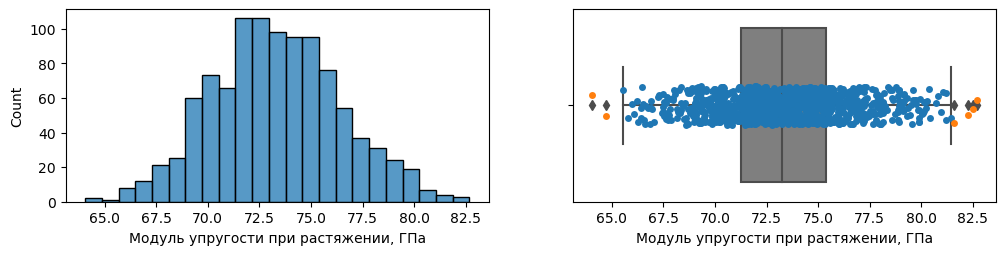

Прочность при растяжении, МПа: 3s=0 iq=11


Потребление смолы, г/м2: 3s=3 iq=8


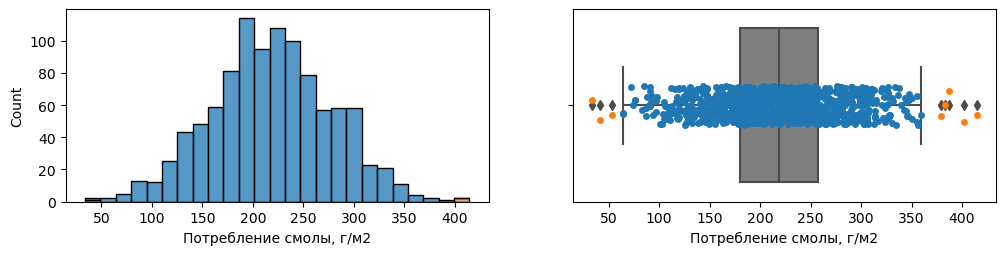

Угол нашивки, град: 3s=0 iq=0


Шаг нашивки: 3s=0 iq=4


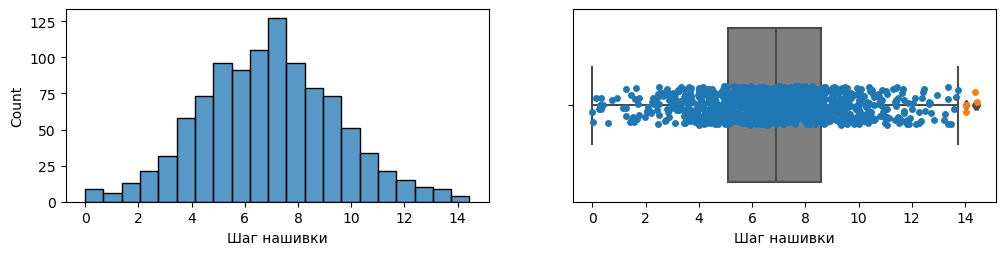

Плотность нашивки: 3s=7 iq=21


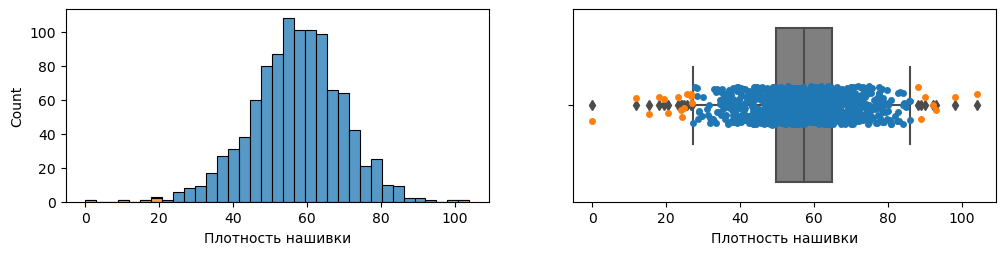

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [490]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

На сырых данных я бы применил метод межквартильных расстояний, чтоб получить более "чистые" данные. Но раз датасет уже очищен от явного шума, применю метод 3-х сигм, чтобы потерять меньше значимой информации

In [491]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [492]:
# Очищенные данные сохраняем
df.to_excel(r"C:\VKR\Datasets\itog_2.xlsx")

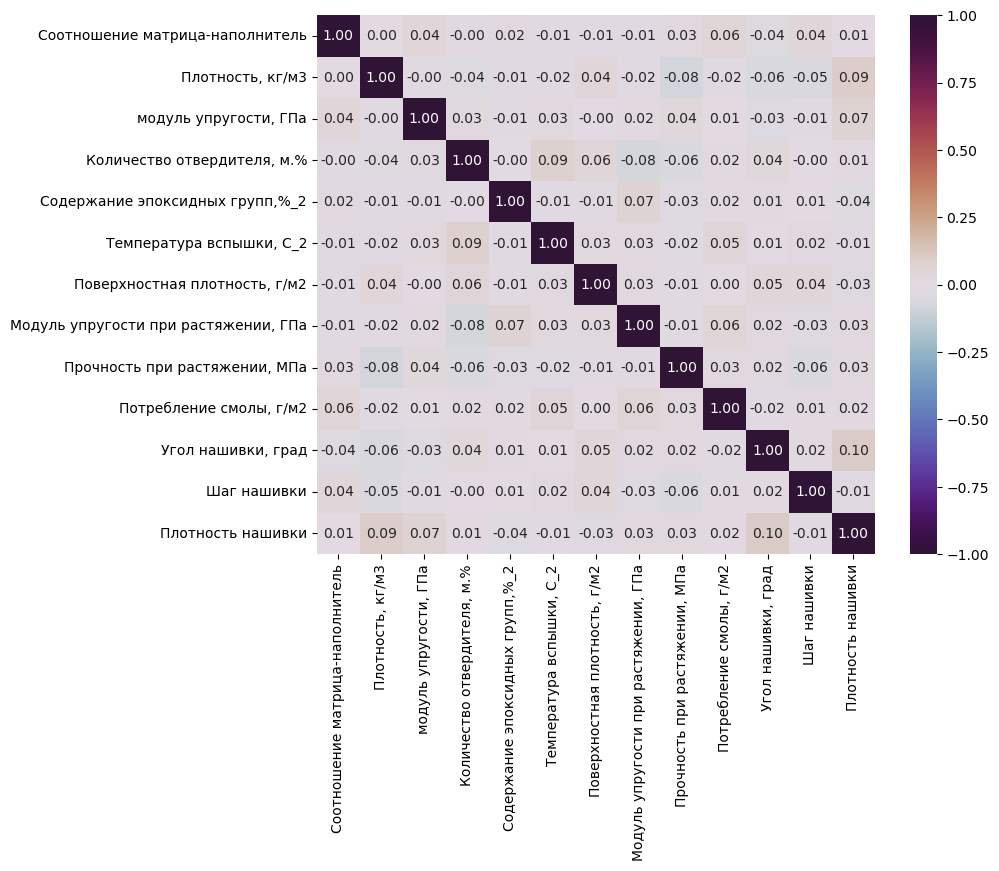

In [493]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

## Обучить нескольких моделей

В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [494]:
# Загрузить данные, подготовленные на предыдущем шаге
df= pd.read_excel(r"C:\VKR\Datasets\itog_2.xlsx")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           1.857143       2030.000000             738.736842   
1                           1.857143       2030.000000             738.736842   
2                           2.771331       2030.000000             753.000000   
3                           2.767918       2000.000000             748.000000   
4                           2.569620       1910.000000             807.000000   
..                               ...               ...                    ...   
995                         2.271346       1952.087902             912.855545   
996                         3.444022       2050.089171             444.732634   
997                         3.280604       1972.372865             416.836524   
998                         3.705351       2066.799773             741.475517   
999                         3.808020       1890.413468             417.316232   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                      50.000000                        23.750000   
1                     129.000000                        21.250000   
2                     111.860000                        22.267857   
3                     111.860000                        22.267857   
4                     111.860000                        22.267857   
..                           ...                              ...   
995                    86.992183                        20.123249   
996                   145.981978                        19.599769   
997                   110.533477                        23.957502   
998                   141.397963                        19.246945   
999                   129.183416                        27.474763   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  284.615385                     210.000000   
1                  300.000000                     210.000000   
2                  284.615385                     210.000000   
3                  284.615385                     210.000000   
4                  284.615385                     210.000000   
..                        ...                            ...   
995                324.774576                     209.198700   
996                254.215401                     350.660830   
997                248.423047                     740.142791   
998                275.779840                     641.468152   
999                300.952708                     758.747882   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               70.000000                    3000.000000   
1                               70.000000                    3000.000000   
2                               70.000000                    3000.000000   
3                               70.000000                    3000.000000   
4                               70.000000                    3000.000000   
..                                    ...                            ...   
995                             73.090961                    2387.292495   
996                             72.920827                    2360.392784   
997                             74.734344                    2662.906040   
998                             74.042708                    2071.715856   
999                             74.309704                    2856.328932   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 220.000000                   0     4.000000   
1                 220.000000                   0     5.000000   
2                 220.000000                   0     5.000000   
3                 220.000000                   0     5.000000   
4                 220.000000                   0     5.000000   
..                       ...                 ...          ...   
995               125.007669                  90     9.076380   
9

### Разделить данные на входные и выходные признаки

Статистическими методами мы зависимостей не обнаружили. Хорошо бы узнать, какие связи между признаками видит специалист по предметной области. 

Можно предположить, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

В этой работе я понял предметную область и распределил признаки по группам, как показано на рисунке выше.

Для каждого из целевых признаков построю отдельную модель, следовательно решу 3 отдельные задачи.

In [495]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [496]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [497]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [498]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [499]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [500]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение).

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки'. Он принимает значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [501]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [502]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [503]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [504]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [505]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [506]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [507]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [508]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

In [509]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [510]:
# Выполняю препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [511]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [512]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [513]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [514]:
# Описательная статистика выходной переменной
print('min',y1_train.min(),'max',y1_train.max(),'mean',y1_train.mean(),'std',y1_train.std())


min 65.5533359100584 max 82.682051035271 mean 73.37095700483971 std 3.1007633674939403


In [515]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные мод

In [516]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [517]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [518]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
873  {'alpha': 1240, 'positive': True, 'solver': 'lbfgs'} -2.503279     1

In [519]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term.

In [520]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
8  {'alpha': 0.5} -2.504841     1
9    {'alpha': 1} -2.504841     1

In [521]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [522]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
7  {'C': 0.01, 'kernel': 'poly'} -2.507476     1

In [523]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [524]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
13  {'n_neighbors': 29} -2.559409     1

In [525]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [526]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
0    {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 1, 'random_state': 48, 'splitter': 'best'}   
60    {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'random_state': 48, 'splitter': 'best'}   
180        {'criterion': 'poisson', 'max_depth': 1, 'max_features': 1, 'random_state': 48, 'splitter': 'best'}   

          MAE  rank  
0   -2.507916     1  
60  -2.507916     1  
180 -2.507916     1

In [527]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [528]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params  \
18  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 1, 'n_estimators': 50, 'random_state': 48}   

         MAE  rank  
18 -2.528741    10

In [529]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [530]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [531]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

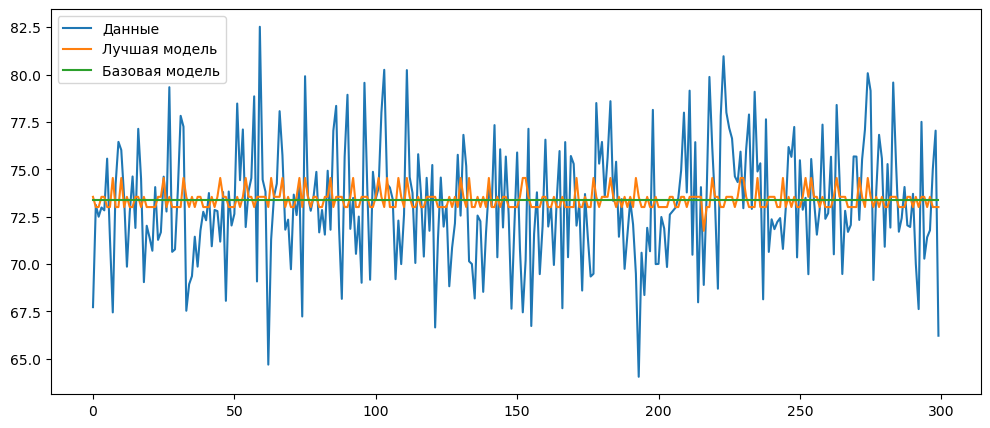

In [532]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным

In [533]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

C:\Users\79606\AppData\Local\Temp\ipykernel_10868\2200776535.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.003148 -3.140401 -2.488193 -0.034106   
Лучшая модель (дерево решений) -0.004391 -3.142345 -2.483150 -0.034061   

                                max_error  
Базовая модель                  -9.316896  
Лучшая модель (дерево решений)  -9.496373

### Модель для прочности при растяжении, МПа

In [534]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [535]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [536]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [537]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [538]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [539]:
# Описательная статистика выходной переменной
print('min',y2_train.min(),'max',y2_train.max(),'mean',y2_train.mean(),'std',y2_train.std())

min 1036.85660535 max 3848.43673187618 mean 2454.3090391064434 std 486.0443079466599


In [540]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [541]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [542]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [543]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
691  {'alpha': 990, 'random_state': 48, 'solver': 'sag'} -379.473442     1

In [544]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [545]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
3  {'alpha': 10} -379.518268     1

In [546]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [547]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
14  {'C': 0.3, 'gamma': 'scale', 'kernel': 'rbf'} -379.739475     1

In [548]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [549]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
124  {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 3, 'random_state': 48, 'splitter': 'best'}   

            MAE  rank  
124 -376.666752     1

In [550]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [551]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
37  {'loss': 'absolute_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 100, 'random_state': 48}   

           MAE  rank  
37 -379.367714     1

In [552]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовал несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовал GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [553]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [554]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

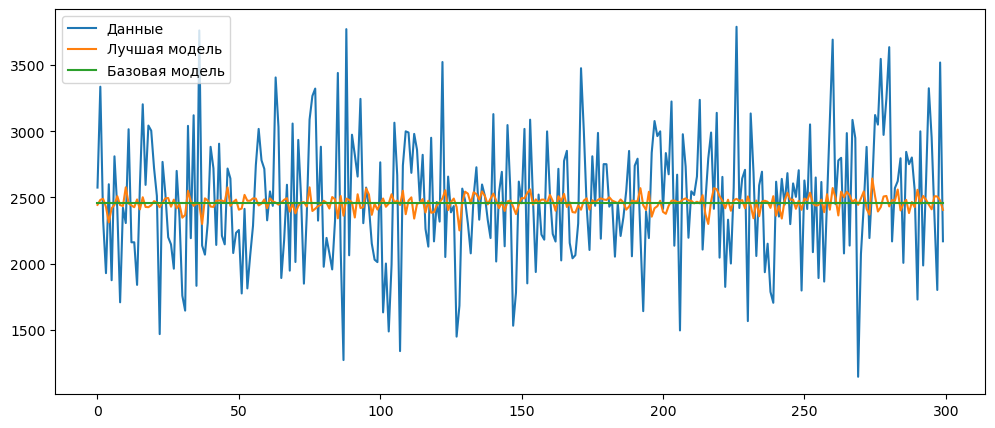

In [555]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [556]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

C:\Users\79606\AppData\Local\Temp\ipykernel_10868\1184163161.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))


R2        RMSE         MAE  \
Базовая модель                      -0.005353 -482.178099 -388.112377   
Лучшая модель (градиентный бустинг)  0.000729 -480.717442 -388.672887   

                                         MAPE    max_error  
Базовая модель                      -0.165765 -1336.763771  
Лучшая модель (градиентный бустинг) -0.165872 -1312.352331

### Модель для соотношения матрица-наполнитель

In [557]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [558]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [559]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [560]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [561]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [562]:
# Описательная статистика выходной переменной
print('min',y3_train.min(),'max',y3_train.max(),'mean',y3_train.mean(),'std',y3_train.std())

min 0.389402605178414 max 5.59174159869754 mean 2.925800051845527 std 0.9223949390508801


По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [563]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [564]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [565]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [566]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 6.54996213
Validation score: -15.090633
Iteration 2, loss = 6.14583583
Validation score: -14.253292
Iteration 3, loss = 5.84811946
Validation score: -13.501508
Iteration 4, loss = 5.55799679
Validation score: -12.697901
Iteration 5, loss = 5.25705145
Validation score: -11.971497
Iteration 6, loss = 4.97886449
Validation score: -11.242755
Iteration 7, loss = 4.68661954
Validation score: -10.369406
Iteration 8, loss = 4.33165085
Validation score: -9.339895
Iteration 9, loss = 3.92707579
Validation score: -8.253632
Iteration 10, loss = 3.50278405
Validation score: -7.069035
Iteration 11, loss = 3.02516735
Validation score: -5.725706
Iteration 12, loss = 2.50321245
Validation score: -4.222989
Iteration 13, loss = 1.92554369
Validation score: -2.693605
Iteration 14, loss = 1.37565317
Validation score: -1.497319
Iteration 15, loss = 0.98749562
Validation score: -1.067334
Iteration 16, loss = 0.91705231
Validation score: -1.207739
Iteration 17, loss = 0.96073005
Validation

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=48, validation_fraction=0.3, verbose=True)

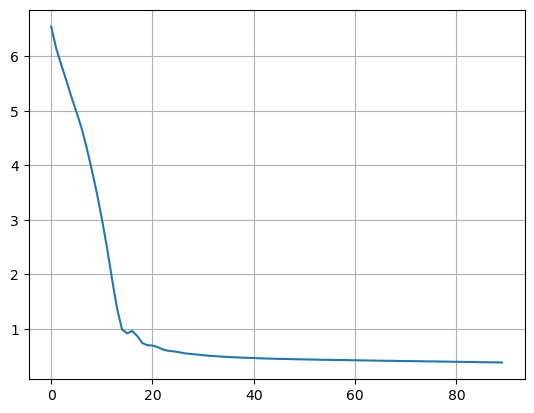

In [567]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [568]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

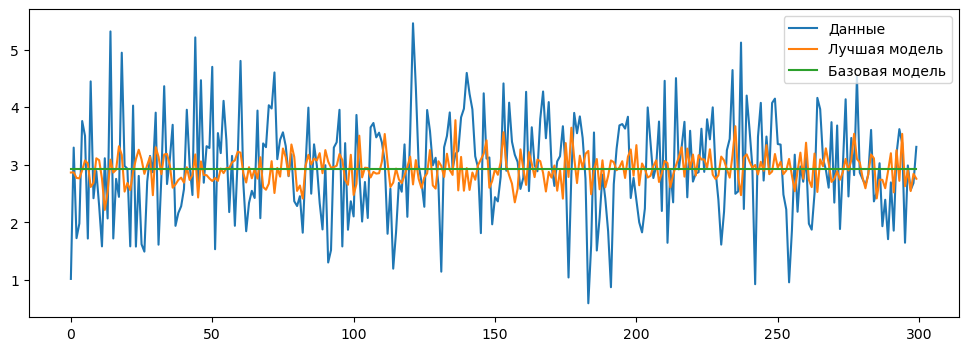

In [569]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [570]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

C:\Users\79606\AppData\Local\Temp\ipykernel_10868\2063716829.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.001603 -0.874823 -0.695104 -0.291611  -2.529766
MLPRegressor   -0.042760 -0.892616 -0.717107 -0.298458  -2.796136

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [571]:
# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [572]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [573]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [574]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [575]:
# Собираю нейросеть
model3_2 = construct_model()

In [576]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [577]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)               

In [578]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [579]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 19ms/step - loss: 98.2710 - root_mean_squared_error: 3.0699 - val_loss: 93.1301 - val_root_mean_squared_error: 2.7986
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 84.8957 - root_mean_squared_error: 2.7564 - val_loss: 65.1681 - val_root_mean_squared_error: 2.1415
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5501 - root_mean_squared_error: 1.7508 - val_loss: 41.4918 - val_root_mean_squared_error: 1.2795
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 38.1129 - root_mean_squared_error: 1.2992 - val_loss: 33.9530 - val_root_mean_squared_error: 1.1594
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 35.0490 - root_mean_squared_error: 1.1984 - val_loss: 32.6753 - val_root_mean_squared_error: 1.1014
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 33.3165 - root_mean_squared_error: 1.1488 - val_loss: 32.3073 - val

16/16 [==============================] - 0s 5ms/step - loss: 16.5619 - root_mean_squared_error: 0.7820 - val_loss: 36.8460 - val_root_mean_squared_error: 1.1514
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 15.9894 - root_mean_squared_error: 0.7765 - val_loss: 36.8291 - val_root_mean_squared_error: 1.1556
Epoch 50/50
16/16 [==============================] - 0s 5ms/step - loss: 15.8656 - root_mean_squared_error: 0.7832 - val_loss: 38.4479 - val_root_mean_squared_error: 1.1712
CPU times: total: 34.7 s
Wall time: 4.53 s


In [580]:
plot_loss(history.history)

In [581]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1ms/step - loss: 34.2701 - root_mean_squared_error: 1.1164


[34.27005386352539, 1.1163533926010132]

In [582]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


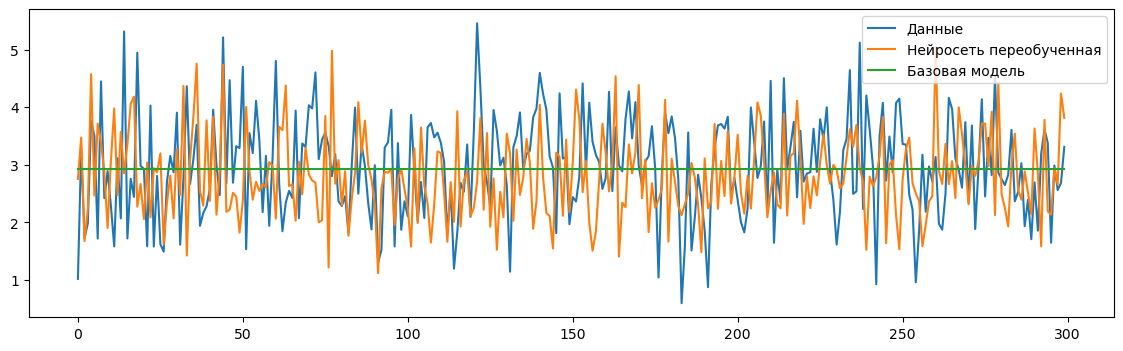

In [583]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [584]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [585]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 1s 19ms/step - loss: 96.6071 - root_mean_squared_error: 3.0333 - val_loss: 89.4406 - val_root_mean_squared_error: 2.7101
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 77.3840 - root_mean_squared_error: 2.5747 - val_loss: 53.3252 - val_root_mean_squared_error: 1.8462
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 45.8659 - root_mean_squared_error: 1.5931 - val_loss: 39.0130 - val_root_mean_squared_error: 1.2433
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 40.2884 - root_mean_squared_error: 1.3984 - val_loss: 35.4509 - val_root_mean_squared_error: 1.2156
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 37.0776 - root_mean_squared_error: 1.2719 - val_loss: 33.9068 - val_root_mean_squared_error: 1.1279
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 35.2806 - root_mean_squared_error: 1.2472 - val_loss: 32.6480 - val

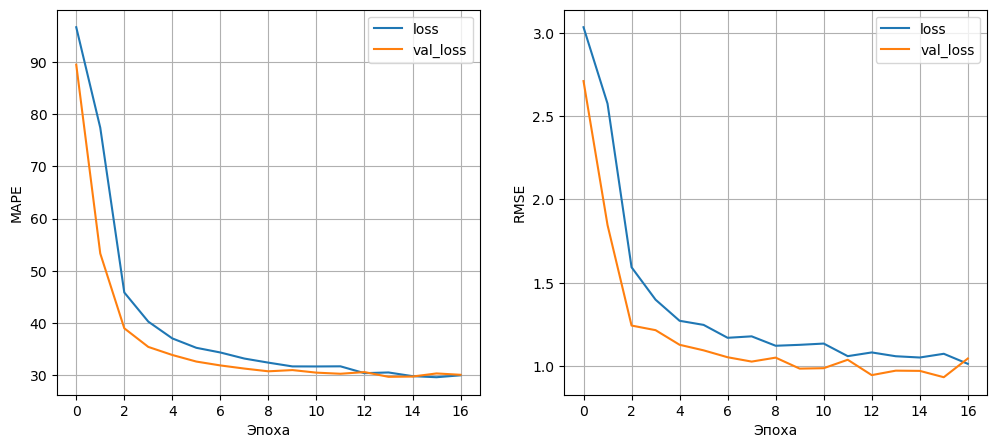

In [586]:
plot_loss(history.history)

In [587]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 31.2170 - root_mean_squared_error: 1.1396


[31.2170467376709, 1.1395835876464844]

In [588]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


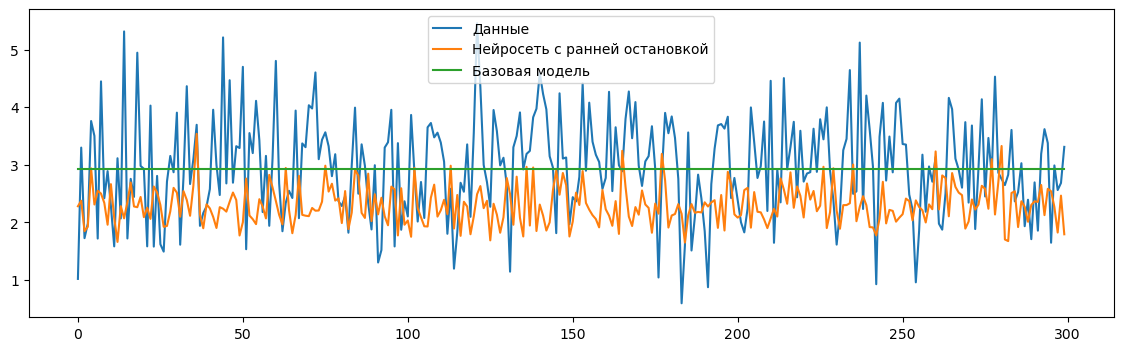

In [589]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [590]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [591]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [592]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [593]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 19ms/step - loss: 98.0742 - root_mean_squared_error: 3.0641 - val_loss: 93.5769 - val_root_mean_squared_error: 2.8077
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 84.6025 - root_mean_squared_error: 2.7460 - val_loss: 66.2464 - val_root_mean_squared_error: 2.1638
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5722 - root_mean_squared_error: 1.7289 - val_loss: 35.7260 - val_root_mean_squared_error: 1.1433
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1751 - root_mean_squared_error: 1.3807 - val_loss: 36.0519 - val_root_mean_squared_error: 1.2982
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 40.4415 - root_mean_squared_error: 1.3763 - val_loss: 31.1248 - val_root_mean_squared_error: 1.0946
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 36.2213 - root_mean_squared_error: 1.2407 - val_loss: 31.3477 - val

16/16 [==============================] - 0s 4ms/step - loss: 27.4885 - root_mean_squared_error: 0.9460 - val_loss: 31.5530 - val_root_mean_squared_error: 1.1133
Epoch 49/50
16/16 [==============================] - 0s 4ms/step - loss: 27.3285 - root_mean_squared_error: 1.0379 - val_loss: 30.2250 - val_root_mean_squared_error: 0.9851
Epoch 50/50
16/16 [==============================] - 0s 4ms/step - loss: 27.8477 - root_mean_squared_error: 0.9753 - val_loss: 30.4015 - val_root_mean_squared_error: 1.0472
CPU times: total: 36.5 s
Wall time: 4.55 s


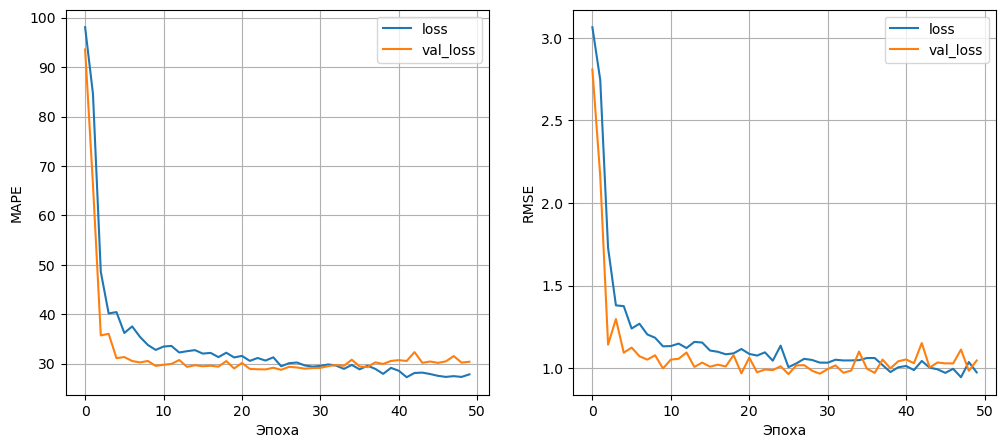

In [594]:
plot_loss(history.history)

In [595]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1ms/step - loss: 31.0180 - root_mean_squared_error: 1.1050


[31.01799201965332, 1.105026125907898]

In [596]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


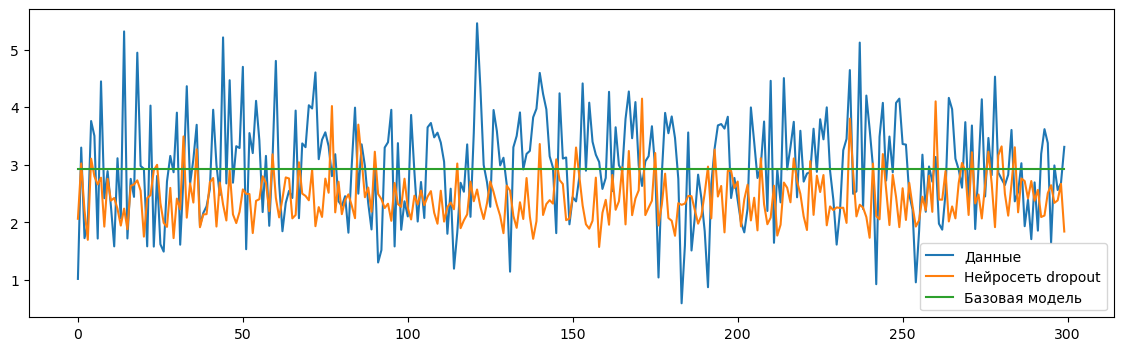

In [597]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [598]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

C:\Users\79606\AppData\Local\Temp\ipykernel_10868\2426911364.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
C:\Users\79606\AppData\Local\Temp\ipykernel_10868\2426911364.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
C:\Users\79606\AppData\Local\Temp\ipykernel_10868\2426911364.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))


R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.001603 -0.874823 -0.695104 -0.291611   
Нейросеть переобученная       -0.631017 -1.116353 -0.905413 -0.342701   
Нейросеть с ранней остановкой -0.699604 -1.139584 -0.926230 -0.312170   
Нейросеть dropout             -0.598087 -1.105026 -0.892067 -0.310180   

                               max_error  
DummyRegressor                 -2.529766  
Нейросеть переобученная        -2.939441  
Нейросеть с ранней остановкой  -3.243230  
Нейросеть dropout              -3.074147

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже» и красиво, но метрики разочаровывают. Лучшая обобщающая спрособность и меньшие значения ошибок на тестовом множестве оказались у нейросети, обученной с ранней остановкой. Но она тоже предсказывает гораздо хуже базовой модели.

## Оценить точность модели на тренировочном и тестовом датасете

In [599]:
## Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=48, splitter='random')

In [600]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.008676 -3.087283 -2.470576 -0.033708   
Модуль упругости, тестовый      -0.004391 -3.142345 -2.483150 -0.034061   

                                 max_error  
Модуль упругости, тренировочный  -9.131618  
Модуль упругости, тестовый       -9.496373

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [601]:
## Модель для прочности при растяжении
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=48)

In [602]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.067591 -469.330723 -368.644282   
Прочность при растяжении, тестовый       0.000729 -480.717442 -388.672887   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.163091 -1374.667882  
Прочность при растяжении, тестовый      -0.165872 -1312.352331

Градиентный бустинг - это прекрасный метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

In [603]:
## Модель для соотношения матрица-наполнитель
model3_3

In [604]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 1ms/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.502750 -1.130733 -0.895799   
Соотношение матрица-наполнитель, тестовый      -0.699604 -1.139584 -0.926230   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.303589   -3.29216  
Соотношение матрица-наполнитель, тестовый      -0.312170   -3.24323

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [605]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [606]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [607]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [608]:
save_object_with_pickle(best_model1, 'model1_best')

In [609]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [610]:
save_object_with_pickle(best_model2, 'model2_best')

In [611]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [612]:
save_object_with_pickle(model3_1, 'model3_1')

In [613]:
model3_2.save(models_path + '/model3_2/')

INFO:tensorflow:Assets written to: C:\VKR\models/model3_2/assets


In [614]:
model3_3.save(models_path + '/model3_3/')

INFO:tensorflow:Assets written to: C:\VKR\models/model3_3/assets


In [615]:
model3_4.save(models_path + '/model3_4/')

INFO:tensorflow:Assets written to: C:\VKR\models/model3_4/assets


In [616]:
# Проверяю загрузку

In [617]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=48, splitter='random')

In [618]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=48)

In [619]:
preprocessor3 = load_object_with_pickle('preprocessor3')
model3_1 = load_object_with_pickle('model3_1')
model3_1

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=48, validation_fraction=0.3, verbose=True)

In [620]:
model3_2 = keras.models.load_model(models_path + '/model3_2/')
model3_2

In [621]:
model3_3 = keras.models.load_model(models_path + '/model3_3/')
model3_3

In [622]:
model3_4 = keras.models.load_model(models_path + '/model3_4/')
model3_4

In [623]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [624]:
# Вход
x1.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [625]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

array([73.55043309])

In [626]:
# Вход
x2.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [627]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

array([2508.92702571])

Примеры для тестирования модели в приложении для задачи 3

In [628]:
# Вход
x3.iloc[19, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [629]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_1.predict(sample_x)

array([2.62089917])